# Ridge and Lasso
Why Regularized? 

Ridge and Lasso are regularization technique use to minimize model overffitng and prevent bias predictions. Having the training dataset score very well but performs significantly worse on test data.

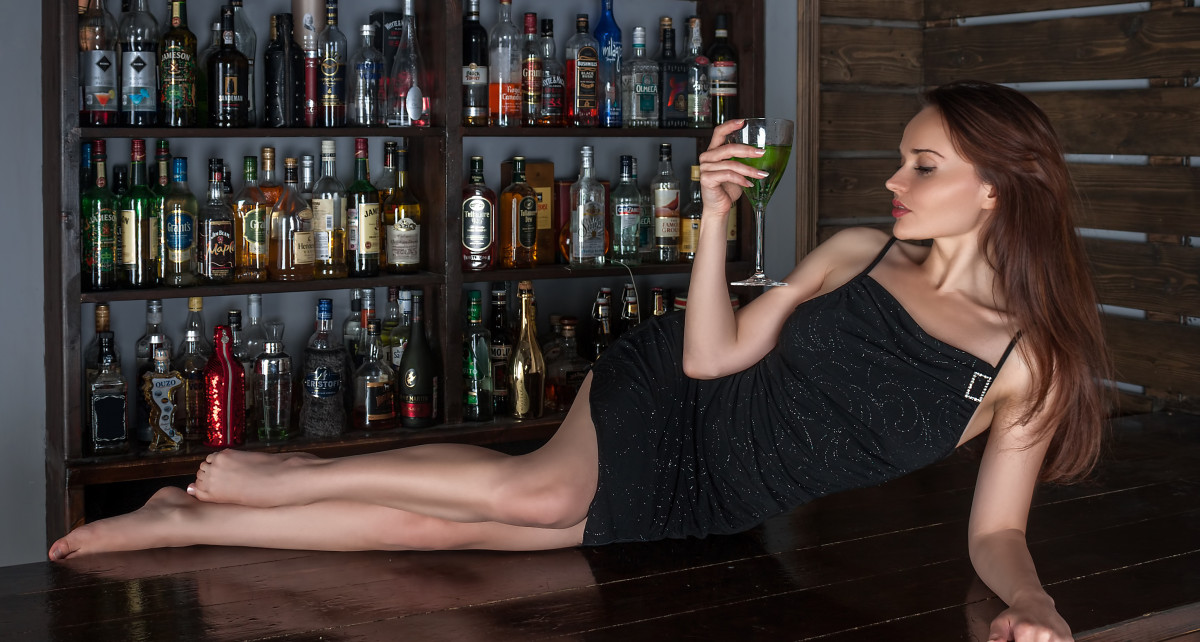

Data Source: [
Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/wine+quality)


`Project Goal:`

The original dataset has a 1-10 rating for each wine, I’ve made it a classification problem with a wine quality of good (>5 rating) or bad (<=5 rating). The goals of this project are to:

1. Implement Ridge(MSE) and Lasso(MAE) regularization both for logistic and linear regression.
2. Find the best alpha value using hyperparameter tuning (GridSearchCV and LogisticRegressionCV.
3. Implement a tuned lasso-regularized feature selection method.

`Content:`

1. Logistic Regression Model 
    - 1.1 Lasso as Feature Selection Method
    - 1.2 Logistic Regression (default/Ridge)
    - 1.3 Hyperparameter Tunning
    - 1.4 Evaluation
2. Linear Regression Model 
    - 2.1 Lasso Regularization for Linear Model 
    - 2.2 Ridge Regularization for Linear Model
3. Conclusion
    

***

# 1. Logistic Regression

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [2]:
df = pd.read_csv('wine_quality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


# 1.1 Lasso as Feature Selection  Method

Instead of using `GridSearchCV`, we’re going to use `LogisticRegressionCV`. The syntax here is a little different. The arguments to LogisticRegressionCV that are relevant to us:

1. `Cs` : A list/array of C values to check; choose values between 0.01 and 100 here.
2. `cv` : Number of folds (5 is a good choice here!)
3. `penalty` : Remember to choose 'l1' for this!
4. `solver` : Recall that L1 penalty requires that we specify the solver to be ‘liblinear’.
5. `scoring` : 'f1' is still a great choice for a classifier.



In [3]:
# Define X and y
y = df['quality']
features = df.drop(columns = ['quality'])

In [4]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [5]:
# array from 0.01 to 100 in 100 values
C_array = np.logspace(-2,2,100)

# instance/object of LogisticRegressionCV
clf_l1 = LogisticRegressionCV(Cs=C_array, 
                              cv = 5, 
                              penalty = 'l1', 
                              scoring = 'f1', 
                              solver = 'liblinear',
                              max_iter = 1000,
                              random_state = 99) 

# Im fitting the 'scaled_features' here rather than the x_train and y_train
# thats because I want this regularization to act as feature selection method
# feature selection must come first before test_train_split
clf_l1.fit(scaled_features, y)

LogisticRegressionCV(Cs=array([1.00000000e-02, 1.09749877e-02, 1.20450354e-02, 1.32194115e-02,
       1.45082878e-02, 1.59228279e-02, 1.74752840e-02, 1.91791026e-02,
       2.10490414e-02, 2.31012970e-02, 2.53536449e-02, 2.78255940e-02,
       3.05385551e-02, 3.35160265e-02, 3.67837977e-02, 4.03701726e-02,
       4.43062146e-02, 4.86260158e-02, 5.33669923e-02, 5.85702082e-02,
       6.42807312e-02, 7.05...
       1.70735265e+01, 1.87381742e+01, 2.05651231e+01, 2.25701972e+01,
       2.47707636e+01, 2.71858824e+01, 2.98364724e+01, 3.27454916e+01,
       3.59381366e+01, 3.94420606e+01, 4.32876128e+01, 4.75081016e+01,
       5.21400829e+01, 5.72236766e+01, 6.28029144e+01, 6.89261210e+01,
       7.56463328e+01, 8.30217568e+01, 9.11162756e+01, 1.00000000e+02]),
                     cv=5, max_iter=1000, penalty='l1', random_state=99,
                     scoring='f1', solver='liblinear')

The classifier has the attribute `C_` which prints the optimal C value. The attribute `coef_` gives us the coefficients of the best lasso-regularized classifier.

In [6]:
# print('Best C value', clf_l1.C_)
# print('Best fit coefficients', clf_l1.coef_)
print(clf_l1.C_, clf_l1.scores_[1].mean(axis=0).max())

[0.25950242] 0.7485264908607883


Visualize the coefficients

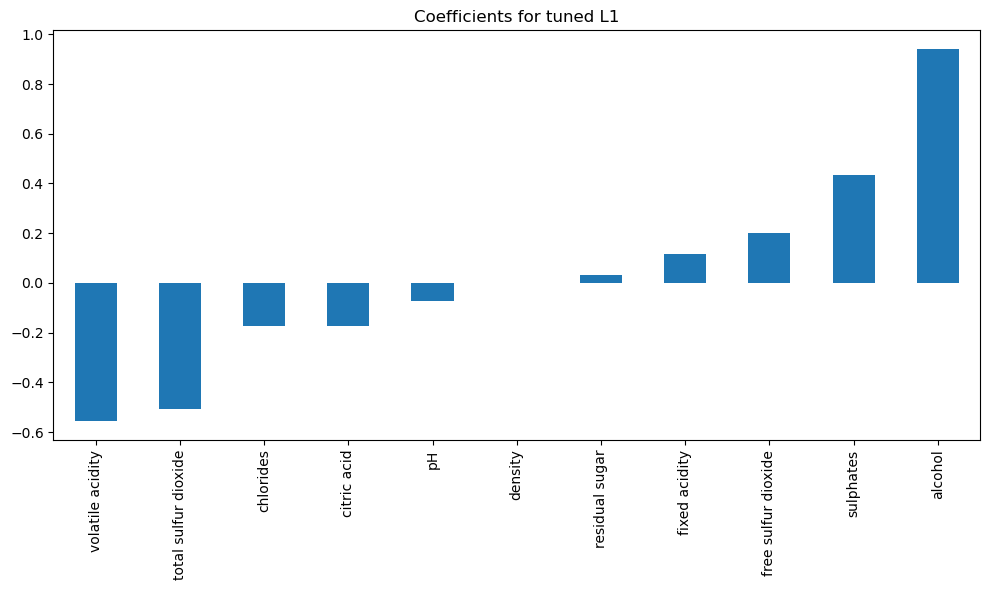

<Figure size 640x480 with 0 Axes>

In [7]:
#
predictors = features.columns

coefficients = clf_l1.coef_.ravel()
coef = pd.Series(coefficients,predictors).sort_values()
 
plt.figure(figsize = (10,6))
coef.plot(kind='bar', title = 'Coefficients for tuned L1')
plt.tight_layout()
plt.show()
plt.clf()

Notice how our Lasso(L1) classifier has set `density` coefficients to zero! We’ve can effectively eliminated this feature from the model, thus using Lasso regularization as a feature selection method here.

# 1.2 Logistic Regression Model 
By default SKlearn has regularized the logistic regression with L2 or Ridge regularization and the default alpha is set to 100.

Predict wine quality
- 1 is good
- 0 is bad

In [8]:
y = df['quality']
# X = df.drop(columns = ['quality', 'total sulfur dioxide', 'free sulfur dioxide', 'residual sugar', 'fixed acidity' ])
X = df.drop(columns = ['density', 'quality' ])

Let's split our dataset

In [9]:
x_train, x_test, y_train, y_test = train_test_split(features, y,  test_size = 0.33, random_state = 99)

Let’s scale our data using StandardScaler().

In [10]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Logistic regresion intance and fit the training dataset

In [11]:
clf_default = LogisticRegression()
clf_default.fit(x_train, y_train)

LogisticRegression()

Checking f1 score.

It is important that the classifier not only has high accuracy, but also high precision and recall, i.e., a low false positive and false negative rate.

A metric known as f1 score, which is the weighted mean of precision and recall, captures the performance of a classifier holistically. 

In [15]:
# check first if our dateset if well balance
df.quality.value_counts() / len(df)

1    0.534709
0    0.465291
Name: quality, dtype: float64

Our dataset is fairly balance, we can use `accuracy` or `f1 score` as our metric.

In [16]:
# setting variables for the predicted training and testing set
y_pred_train = clf_default.predict(x_train)
y_pred_test = clf_default.predict(x_test)
 
# print the f1 score of actual vs prediction for training and testing set   
l2_training = f1_score(y_train, y_pred_train)
l2_testing  = f1_score(y_test, y_pred_test)

print('Ridge-regularized Training Score: ', + l2_training)
print('Ridge-regularized Testing Score: ',  + l2_testing)


Ridge-regularized Training Score:  0.7731520815632966
Ridge-regularized Testing Score:  0.7304015296367112


Let's find the best C value and fit the model again if we can further improve our score.


Creating a for loop with a list of 'C'. Fit every 'C' in our model then visualize each 'C' score.

In [17]:
# Determining the array range to be use in our gridsearchcv
C_array_initial = [0.0001, 0.001, 0.01, 0.1, 1, 2, 3, 4]

training_array = []
test_array = []

for x in C_array_initial:
    # random_state is 0 so we can have the same result
    clf = LogisticRegression(C = x )
    clf.fit(x_train, y_train)
    
    # prediction for the training set
    y_pred_train = clf.predict(x_train)
    
    # prediction for the testing set
    y_pred_test = clf.predict(x_test)

    # actual training values vs predicted training value
    training_array.append(f1_score(y_train, y_pred_train))
    # actual testing values vs predicted testing value
    test_array.append(f1_score(y_test, y_pred_test))
    
# print(training_array)
# print(test_array)

Visualize the training array and testing array score.

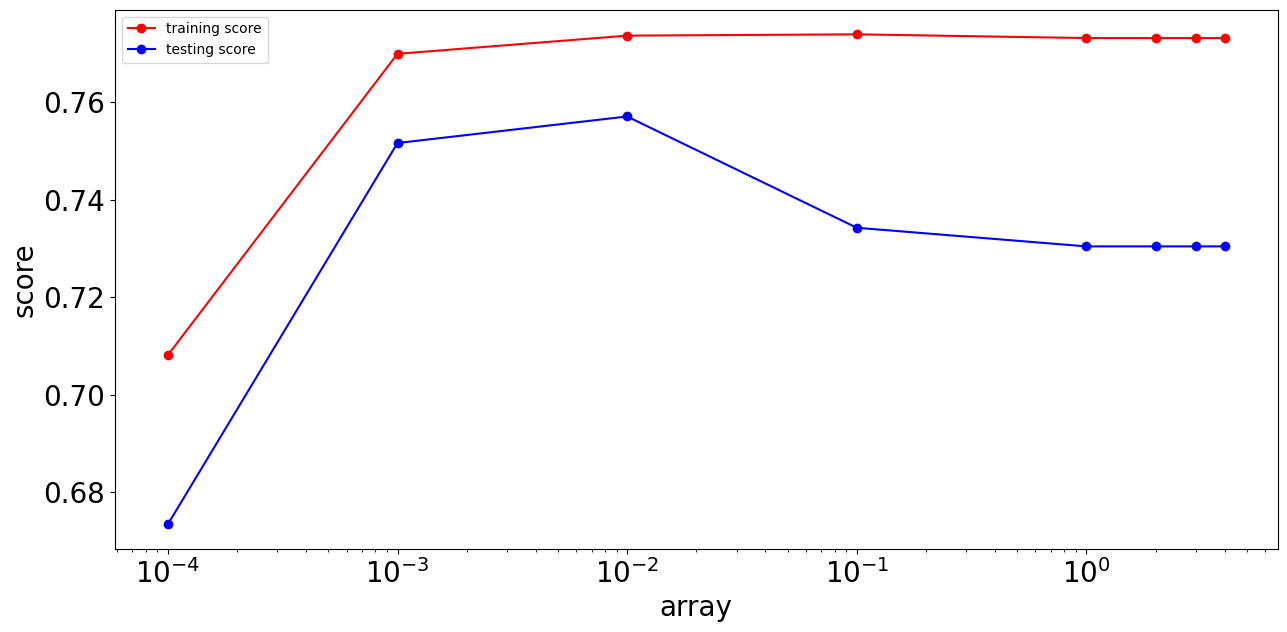

In [18]:
plt.figure(figsize = (15,7))
plt.plot(C_array_initial,training_array, color='r', marker = 'o', label='training score')
plt.plot(C_array_initial,test_array,  color='b', marker = 'o', label='testing score')
plt.legend()
plt.xscale('log' )

# make z and y ticks bigger
plt.xlabel('array', fontsize = 20)
plt.ylabel('score', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.show()

The optimal C seems to be somewhere around 0.001 so a `search window between 0.0001 and 0.01` is not a bad idea here!

# 1.3 Hyperparameter Tuning
### GridSearchCV (Optimal result since we have a very small dataset)
We’re now ready to perform hyperparameter tuning using GridSearchCV! Looking at the plot, the optimal C seems to be somewhere around 0.001 so a search window between 0.0001 and 0.01 is not a bad idea here.

Let’s first get setup with the right inputs for this. Use np.logspace() to obtain 100 values between 10^(-4) and 10^(-2) and define a dictionary of C values named tuning_C that can function as an input to GridSearchCV‘s parameter grid.

In [19]:
# # search between 0.0001 and 0.01 in 100 values
C_array = np.logspace(-4, -2, 100)
# # C_array

In [20]:
tuning_C = [{'C': C_array}]

In [22]:
from sklearn.model_selection import GridSearchCV

# Create an object for ridge classification
clf_gs_L2 = LogisticRegression()

gs = GridSearchCV(estimator = clf_gs_L2, 
                     param_grid = tuning_C, 
                     scoring = 'f1',
                     cv = 5, )

# fit trainning dataset
gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': array([0.0001    , 0.00010476, 0.00010975, 0.00011498, 0.00012045,
       0.00012619, 0.00013219, 0.00013849, 0.00014508, 0.00015199,
       0.00015923, 0.00016681, 0.00017475, 0.00018307, 0.00019179,
       0.00020092, 0.00021049, 0.00022051, 0.00023101, 0.00024201,
       0.00025354, 0.00026561, 0.00027826, 0.00029151, 0.00030539,
       0.0003...
       0.00205651, 0.00215443, 0.00225702, 0.00236449, 0.00247708,
       0.00259502, 0.00271859, 0.00284804, 0.00298365, 0.00312572,
       0.00327455, 0.00343047, 0.00359381, 0.00376494, 0.00394421,
       0.00413201, 0.00432876, 0.00453488, 0.00475081, 0.00497702,
       0.00521401, 0.00546228, 0.00572237, 0.00599484, 0.00628029,
       0.00657933, 0.00689261, 0.00722081, 0.00756463, 0.00792483,
       0.00830218, 0.00869749, 0.00911163, 0.00954548, 0.01      ])}],
             scoring='f1')

 Show best parameters

In [23]:
print(gs.best_params_, gs.best_score_)

{'C': 0.0021544346900318843} 0.7733319626387679


Visualize

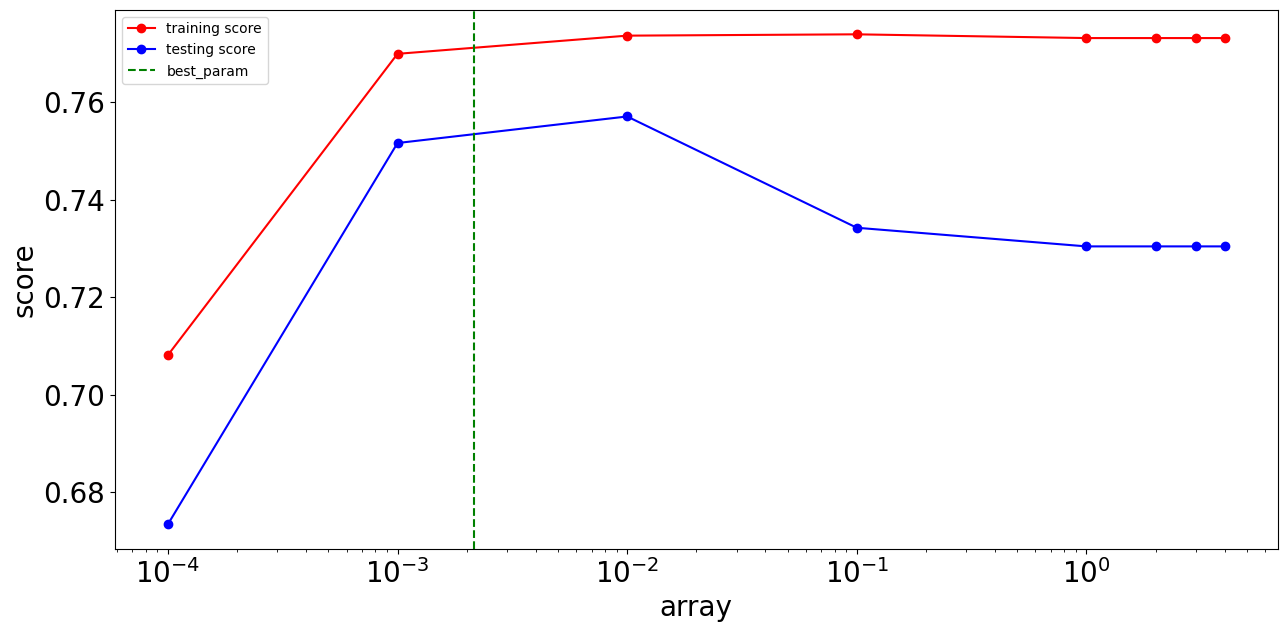

In [24]:
plt.figure(figsize = (15,7))
plt.plot(C_array_initial,training_array, color='r', marker = 'o', label='training score')
plt.plot(C_array_initial,test_array,  color='b', marker = 'o', label='testing score')
plt.xscale('log' )

# make z and y ticks bigger
plt.xlabel('array', fontsize = 20)
plt.ylabel('score', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.axvline(x = gs.best_params_['C'], color ='green', linestyle = '--', label = 'best_param') 
plt.legend()
plt.show()

Fit the model again but this time were setting C to the best_params_ value

In [26]:
clf_gs_L2 = LogisticRegression(C = gs.best_params_['C'], random_state=0)
clf_gs_L2.fit(x_train,y_train)

# predition for training set using clf_best
y_pred_best_train = clf_gs_L2.predict(x_train)

# predition for test set using clf_best
y_pred_best = clf_gs_L2.predict(x_test)

# actual training values vs the predicted train value
l2_training_bestC = f1_score(y_train, y_pred_best_train)
# actual test values vs the predicted test value
l2_testing_bestC  = f1_score(y_test, y_pred_best)


print('Training score: ' + str(l2_training_bestC))
print('Testing score: ' + str(l2_testing_bestC))

Training score: 0.7753446877534469
Testing score: 0.7464788732394366


So far we see a slight improvements in our testing score without loosing too much training score. Very nice.

# 1.4 Evaluation

F1 Scores:

In [27]:
# hide/show
print('Default model(L2):')
print('Training score: ', + l2_training)
print('Testing score: ',  + l2_testing)
print('\n')
print('Hypetuned Model(Best C)')
print('Training score: ' + str(l2_training_bestC))
print('Testing score: ' + str(l2_testing_bestC))

Default model(L2):
Training score:  0.7731520815632966
Testing score:  0.7304015296367112


Hypetuned Model(Best C)
Training score: 0.7753446877534469
Testing score: 0.7464788732394366


In [28]:
y_pred = clf_gs_L2.predict(x_test)
model_matrix = confusion_matrix(y_test, y_pred)
model_matrix

array([[172,  88],
       [ 56, 212]], dtype=int64)

<AxesSubplot:>

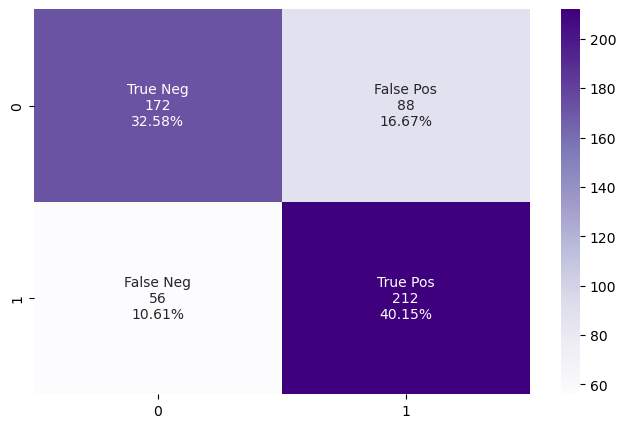

In [29]:
# Visualize
fig, ax = plt.subplots(figsize=(8,5))

# setting variables
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in model_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in model_matrix.flatten()/np.sum(model_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(model_matrix, annot=labels, fmt='', cmap='Purples')

***

# 2. Linear Regression Model

Prediction for pH value


<img src="p.jpg" alt="Drawing" style="width: 750px;"/>


<AxesSubplot:>

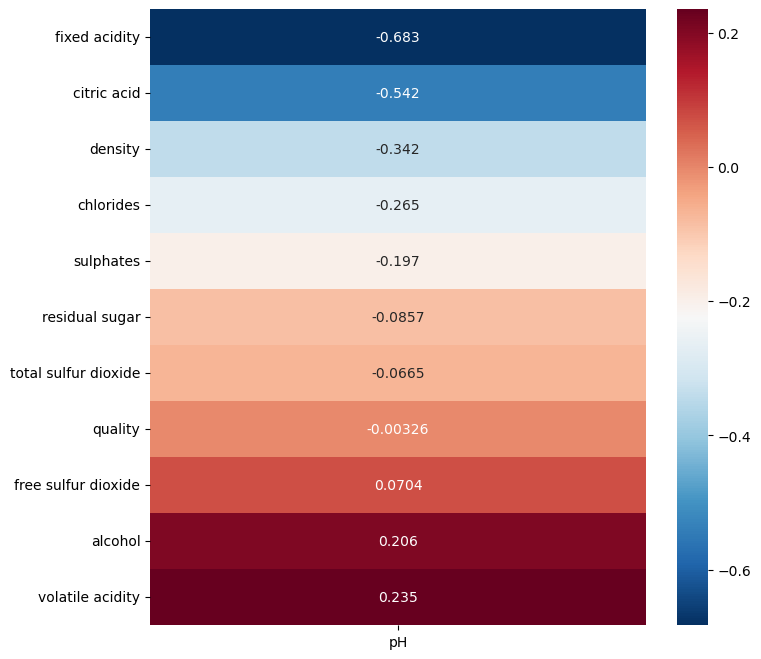

In [30]:
# Correlation between features and target
plt.figure(figsize=(8, 8)) 
corr_matrix = df.corr()
 
# Isolate the column corresponding to `Winnings`
corr_target = corr_matrix[['pH']].drop(labels=['pH'])
corr_target = corr_target.sort_values(by=['pH'], ascending=True)

sns.heatmap(corr_target, annot=True, fmt='.3', cmap='RdBu_r')

In [58]:
from sklearn.linear_model import LinearRegression, Lasso
# Define X and y
y = df[['pH']]
X = df[['fixed acidity', 'citric acid', 'density', 'chlorides']]

x_train, x_test, y_train, y_test = train_test_split(X, y,  test_size = 0.30, random_state = 99)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

### Checking r2 score for linear regression model

In [59]:
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.5729289704682068
0.4726507603306773


# 2.1 Lasso Regularization for Linear Model 

Check for the best `alpha` using gridseachcv

In [88]:
## an array of alpha values between 0.000001 and .001
alpha_array = np.logspace(-6, -3, 50)
 
#dict with key (alpha) and values being alpha_array
tuned_parameters = [{'alpha': alpha_array}]

In [87]:
from sklearn.model_selection import GridSearchCV

gs_l1 = GridSearchCV(estimator = Lasso(), 
                     param_grid = tuned_parameters, 
                     scoring = 'r2',
                     cv = 5, 
                     return_train_score = True)

# Gridsearch fit X and y
gs_l1.fit(X, y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid=[{'alpha': array([1.00000000e-06, 1.15139540e-06, 1.32571137e-06, 1.52641797e-06,
       1.75751062e-06, 2.02358965e-06, 2.32995181e-06, 2.68269580e-06,
       3.08884360e-06, 3.55648031e-06, 4.09491506e-06, 4.71486636e-06,
       5.42867544e-06, 6.25055193e-06, 7.19685673e-06, 8.28642773e-06,
       9.54095476e-06, 1.09854114e-05, 1.26485522e-05, 1...
       5.17947468e-05, 5.96362332e-05, 6.86648845e-05, 7.90604321e-05,
       9.10298178e-05, 1.04811313e-04, 1.20679264e-04, 1.38949549e-04,
       1.59985872e-04, 1.84206997e-04, 2.12095089e-04, 2.44205309e-04,
       2.81176870e-04, 3.23745754e-04, 3.72759372e-04, 4.29193426e-04,
       4.94171336e-04, 5.68986603e-04, 6.55128557e-04, 7.54312006e-04,
       8.68511374e-04, 1.00000000e-03])}],
             return_train_score=True, scoring='r2')

In [89]:
gs_l1.best_params_['alpha'], gs.best_score_

(1e-06, 0.7733319626387679)

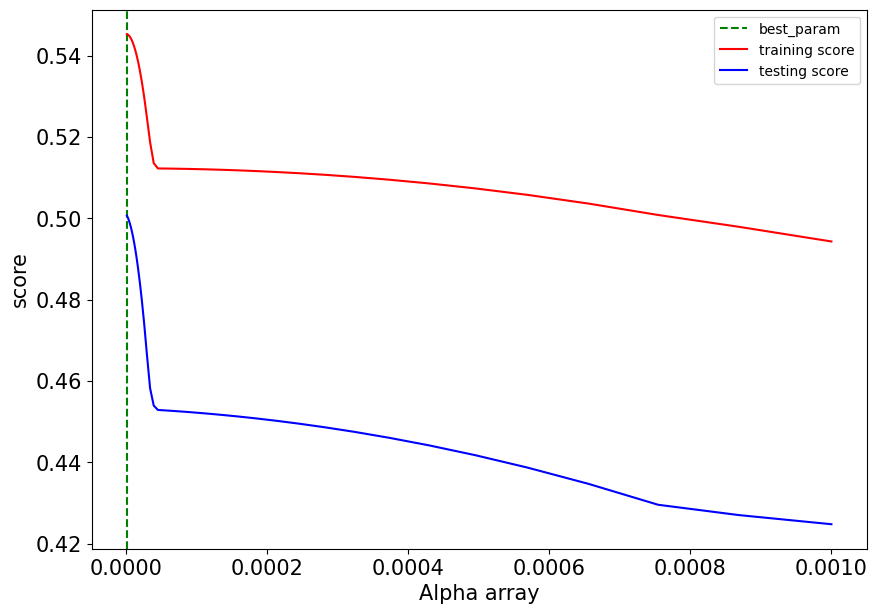

In [90]:
# Visualize
test_scores = gs_l1.cv_results_['mean_test_score']
train_scores = gs_l1.cv_results_['mean_train_score']

plt.figure(figsize=(10, 7)) 

plt.xlabel('Alpha array', fontsize=15)
plt.ylabel('score', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.axvline(x = gs_l1.best_params_['alpha'], color ='green', linestyle = '--', label = 'best_param') 

plt.plot(alpha_array, train_scores, color='r', label='training score')
plt.plot(alpha_array, test_scores, color='b', label='testing score' )

plt.legend()

##### Fitting lasso regression model

In [91]:
lasso = Lasso(alpha = gs_l1.best_params_['alpha'])
lasso.fit(x_train, y_train)

Lasso(alpha=1e-06)

##### Lasso R2 score

In [94]:
print(lasso.score(x_train,y_train))
print(lasso.score(x_test,y_test))

0.572928970148529
0.47265179446310734


# 2.2 Ridge Regularization for Linear Model

In [95]:

alpha_array = np.logspace(-2, .2, 50)
 
#dict with key (alpha) and values being alpha_array
tuned_parameters = [{'alpha': alpha_array}]

In [96]:
gs_l2 = GridSearchCV(estimator = Ridge(), 
                     param_grid = tuned_parameters, 
                     scoring = 'neg_mean_squared_error',
                     cv = 5, 
                     return_train_score = True)

# Gridsearch fit X and y
gs_l2.fit(X, y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': array([0.01      , 0.01108914, 0.01229691, 0.01363622, 0.01512139,
       0.01676833, 0.01859464, 0.02061986, 0.02286566, 0.02535605,
       0.02811769, 0.0311801 , 0.03457606, 0.03834189, 0.04251786,
       0.04714866, 0.05228382, 0.05797828, 0.06429294, 0.07129535,
       0.07906043, 0.08767124, 0.09721988, 0.10780851, 0.1195504 ,
       0.13257114, 0.14701002, 0.1630215 , 0.18077687, 0.20046604,
       0.22229965, 0.24651124, 0.27335983, 0.30313261, 0.33614806,
       0.37275937, 0.41335817, 0.45837876, 0.50830274, 0.56366414,
       0.62505519, 0.6931326 , 0.76862461, 0.85233877, 0.9451706 ,
       1.04811313, 1.16226758, 1.28885506, 1.42922973, 1.58489319])}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [68]:
gs_l1.best_params_['alpha'], gs.best_score_

(1e-06, 0.7733319626387679)

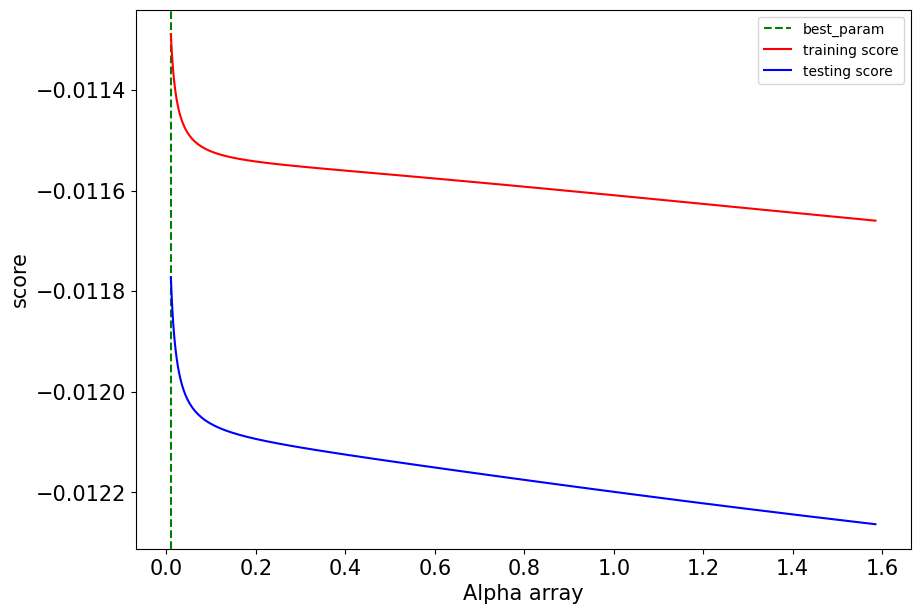

In [97]:
test_scores = gs_l2.cv_results_['mean_test_score']
train_scores = gs_l2.cv_results_['mean_train_score']

plt.figure(figsize=(10, 7)) 

plt.xlabel('Alpha array', fontsize=15)
plt.ylabel('score', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.axvline(x = gs_l2.best_params_['alpha'], color ='green', linestyle = '--', label = 'best_param') 

plt.plot(alpha_array, train_scores, color='r', label='training score')
plt.plot(alpha_array, test_scores, color='b', label='testing score' )

plt.legend()

##### Fitting Ridge regression model

In [98]:
ridge = Ridge(alpha = gs_l2.best_params_['alpha'])
ridge.fit(x_train, y_train)

Ridge(alpha=0.01)

#### Ridge R2 score

In [99]:
print(ridge.score(x_train,y_train))
print(ridge.score(x_test,y_test))

0.57292897024425
0.47265114110519746


In [100]:
# hide/show
print('r2 scores:')
print('\n')
print('Default linear regression:')
print('Training score: ', + lr.score(x_train,y_train))
print('Testing score: ',  + lr.score(x_test,y_test))
print('\n')
print('Lasso:')
print('Training score: ' + str(lasso.score(x_train,y_train)))
print('Testing score: ' + str(lasso.score(x_test,y_test)))
print('\n')
print('Ridge:')
print('Training score: ' + str(ridge.score(x_train,y_train)))
print('Testing score: ' + str(ridge.score(x_test,y_test)))

r2 scores:


Default linear regression:
Training score:  0.5729289704682068
Testing score:  0.4726507603306773


Lasso:
Training score: 0.572928970148529
Testing score: 0.47265179446310734


Ridge:
Training score: 0.57292897024425
Testing score: 0.47265114110519746


# 3. Conclusion
Work in progress... 

`Linear Regression Hyperparameter tuning is for further analysis`